## **Activation Functions **

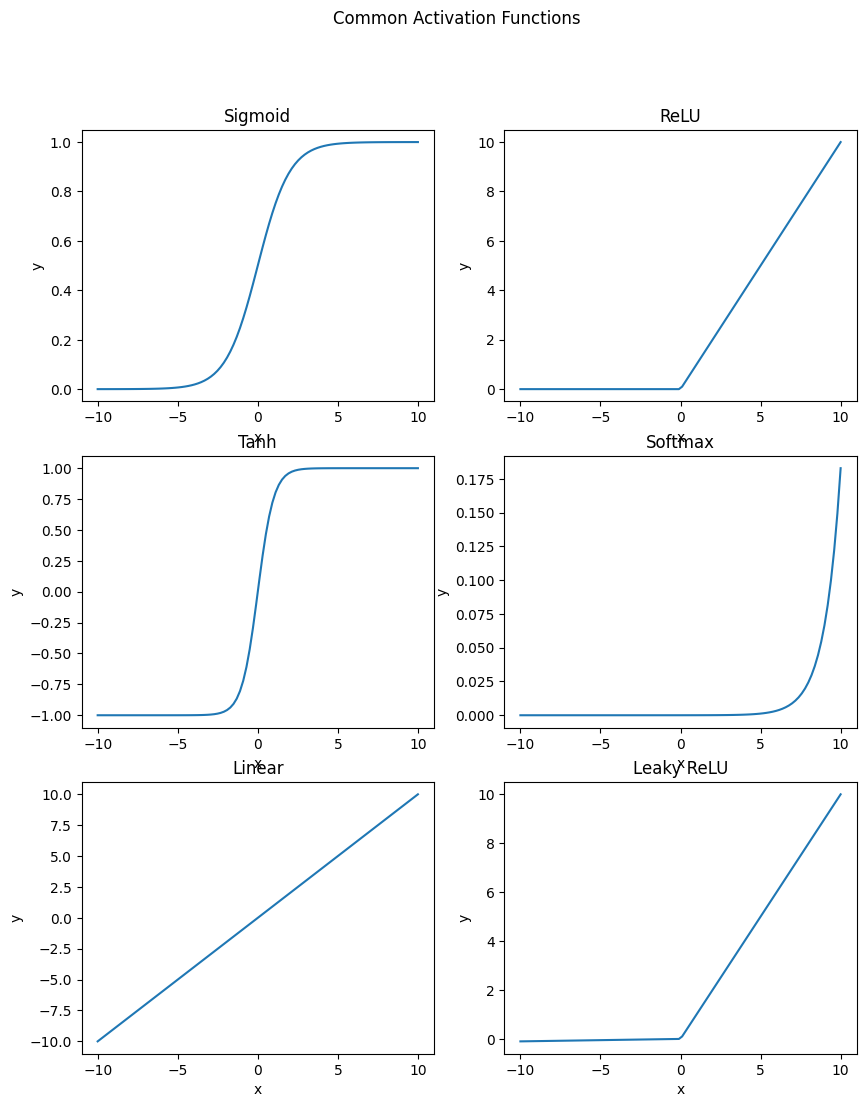

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x): return 1 / (1 + np.exp(-x))
def relu(x): return np.maximum(0, x)
def tanh(x): return np.tanh(x)
def softmax(x): return np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)))
def linear(x): return x
def leaky_relu(x, alpha=0.01): return np.where(x > 0, x, alpha * x)

# Create a wider range of values
x = np.linspace(-10, 10, 100)

# Activation functions and their titles
functions = [sigmoid, relu, tanh, softmax, linear, leaky_relu]
titles = ['Sigmoid', 'ReLU', 'Tanh', 'Softmax', 'Linear', 'Leaky ReLU']

# Create plots
fig, axs = plt.subplots(3, 2, figsize=(10, 12))
for ax, func, title in zip(axs.flat, functions, titles):
    ax.plot(x, func(x))
    ax.set_title(title)
    ax.set(xlabel='x', ylabel='y')

fig.suptitle('Common Activation Functions')
plt.show()

In [1]:
!pip install numpy tensorflow scikit-learn

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to run multi-class classification with different activation functions
def run_iris_classification(activation):
    # Load the Iris dataset
    iris = load_iris()
    X, y = iris.data, iris.target
    y = keras.utils.to_categorical(y, num_classes=3)

    # Standardize the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the model
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(64, activation=activation),
        layers.Dense(3, activation='softmax')  # Output layer for multi-class classification
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

# List of activation functions to apply
activation_functions = ['sigmoid', 'tanh', 'relu', 'softmax', 'linear']

# Run the classification for each activation function and print the accuracy
for activation in activation_functions:
    accuracy = run_iris_classification(activation)
    print(f'Accuracy with {activation} activation: {accuracy:.4f}')

Accuracy with sigmoid activation: 1.0000
Accuracy with tanh activation: 1.0000
Accuracy with relu activation: 1.0000
Accuracy with softmax activation: 0.9333


Accuracy with linear activation: 1.0000


In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to run multi-class classification with Softmax activation in the output layer
def run_multi_class_classification(hidden_activation):
    # Load the Iris dataset
    iris = load_iris()
    X, y = iris.data, iris.target

    # Convert labels to categorical
    y = keras.utils.to_categorical(y, num_classes=3)

    # Standardize the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the model
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(64, activation=hidden_activation),  # Hidden layer with specified activation
        layers.Dense(3, activation='softmax')  # Output layer with Softmax activation
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    # Evaluate the model
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]  # Get accuracy from evaluation
    return accuracy

# List of hidden layer activation functions to apply
activation_functions = {
    'Tanh': 'tanh',
    'Sigmoid': 'sigmoid',
    'ReLU': 'relu',
    'Leaky ReLU': layers.LeakyReLU(alpha=0.2),
    'Linear': 'linear'
}

# Run the classification for each hidden layer activation function and print the accuracy
print("=== Multi-Class Classification with Different Hidden Layer Activations on Iris Dataset ===")
for name, activation in activation_functions.items():
    accuracy = run_multi_class_classification(activation)
    print(f'Accuracy with {name} activation in hidden layer (Softmax in output): {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


=== Multi-Class Classification with Different Hidden Layer Activations on Iris Dataset ===
Accuracy with Tanh activation in hidden layer (Softmax in output): 0.9667
Accuracy with Sigmoid activation in hidden layer (Softmax in output): 0.9333
Accuracy with ReLU activation in hidden layer (Softmax in output): 0.9667
Accuracy with Leaky ReLU activation in hidden layer (Softmax in output): 0.9667
Accuracy with Linear activation in hidden layer (Softmax in output): 0.9667


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to run multi-class classification with specified activation functions
def run_multi_class_classification(hidden_activation):
    # Load the Iris dataset
    iris = load_iris()
    X, y = iris.data, iris.target

    # Convert labels to categorical (if using Softmax, this is necessary)
    y = keras.utils.to_categorical(y, num_classes=3)

    # Standardize the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the model
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(64, activation=hidden_activation),  # Hidden layer with specified activation
        layers.Dense(3)  # Output layer without Softmax
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    # Evaluate the model
    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]  # Get accuracy from evaluation
    return accuracy

# List of hidden layer activation functions to apply
activation_functions = {
    'Tanh': 'tanh',
    'Sigmoid': 'sigmoid',
    'ReLU': 'relu',
    'Leaky ReLU': layers.LeakyReLU(alpha=0.2),
    'Linear': 'linear'
}

# Run the classification for each hidden layer activation function and print the accuracy
print("=== Multi-Class Classification with Different Hidden Layer Activations on Iris Dataset ===")
for name, activation in activation_functions.items():
    accuracy = run_multi_class_classification(activation)
    print(f'Accuracy with {name} activation in hidden layer (no Softmax in output): {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


=== Multi-Class Classification with Different Hidden Layer Activations on Iris Dataset ===
Accuracy with Tanh activation in hidden layer (no Softmax in output): 0.9000
Accuracy with Sigmoid activation in hidden layer (no Softmax in output): 0.9000
Accuracy with ReLU activation in hidden layer (no Softmax in output): 1.0000
Accuracy with Leaky ReLU activation in hidden layer (no Softmax in output): 0.9667
Accuracy with Linear activation in hidden layer (no Softmax in output): 0.8667


**GATES AND EVEN ODD**

In [23]:
import numpy as np

# Function to determine odd or even based on weights
def classify_number(j):
    step_function = lambda x: 1 if x >= 0 else 0

    # Define training data
    training_data = [
        ([1, 1, 0, 0, 0, 0], 1),
        ([1, 1, 0, 0, 0, 1], 0),
        ([1, 1, 0, 0, 1, 0], 1),
        ([1, 1, 0, 1, 1, 1], 0),
        ([1, 1, 0, 1, 0, 0], 1),
        ([1, 1, 0, 1, 0, 1], 0),
        ([1, 1, 0, 1, 1, 0], 1),
        ([1, 1, 0, 1, 1, 1], 0),
        ([1, 1, 1, 0, 0, 0], 1),
        ([1, 1, 1, 0, 0, 1], 0),
    ]

    weights = np.zeros(6)  # Initialize weights

    # Train the model
    for input_data, label in training_data:
        output = step_function(np.dot(input_data, weights))
        weights += np.array(input_data) * (label - output)

    # Format the input number as binary
    input_number = np.array([int(x) for x in f'{j:06b}'])
    output = "odd" if step_function(np.dot(input_number, weights)) == 0 else "even"

    return f"{j} is {output}"

# Get user input
j = int(input("Enter a Number (0-9): "))
print(classify_number(j))

Enter a Number (0-9): 7
7 is odd


In [24]:
import numpy as np

def step_function(x):
    return 1 if x >= 0 else 0

# AND Gate
def and_gate(x1, x2):
    weights = np.array([1, 1])
    bias = -1.5
    return step_function(np.dot(weights, [x1, x2]) + bias)

# OR Gate
def or_gate(x1, x2):
    weights = np.array([1, 1])
    bias = -0.5
    return step_function(np.dot(weights, [x1, x2]) + bias)

# XOR Gate
def xor_gate(x1, x2):
    # Hidden layer
    h1 = step_function(np.dot([1, 1], [x1, x2]) - 0.5)  # OR gate
    h2 = step_function(np.dot([1, 1], [x1, x2]) - 1.5)  # AND gate
    # Output layer
    return step_function(h1 - h2 - 0.5)

# Test the gates
print("AND Gate:")
print(and_gate(0, 0), and_gate(0, 1), and_gate(1, 0), and_gate(1, 1))

print("\nOR Gate:")
print(or_gate(0, 0), or_gate(0, 1), or_gate(1, 0), or_gate(1, 1))

print("\nXOR Gate:")
print(xor_gate(0, 0), xor_gate(0, 1), xor_gate(1, 0), xor_gate(1, 1))

AND Gate:
0 0 0 1

OR Gate:
0 1 1 1

XOR Gate:
0 1 1 0


### **FORWARD AND BAK PROPOGATION**

In [45]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Squared Error loss function
def squared_error(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for simplicity
y = (iris.target == 0).astype(float).reshape(-1, 1)  # Binary classification (Iris Setosa vs Not Setosa)

# Split dataset into training and testing without scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize weights and biases
weights1 = np.random.rand(2, 2)
bias1 = np.random.rand(2)
weights2 = np.random.rand(2, 1)
bias2 = np.random.rand(1)

# Training parameters
learning_rate = 0.1
epochs = 1000

# Calculate initial accuracy and squared error
hidden_layer = sigmoid(np.dot(X_train, weights1) + bias1)
output_layer = sigmoid(np.dot(hidden_layer, weights2) + bias2)
predictions = (output_layer > 0.5).astype(float)
initial_accuracy = np.mean(predictions == y_train)
initial_squared_error = squared_error(y_train, output_layer)

print("Initial Accuracy:", initial_accuracy)
print("Initial Squared Error:", initial_squared_error)

# Training the network
for epoch in range(epochs):
    # Forward propagation
    hidden_layer = sigmoid(np.dot(X_train, weights1) + bias1)
    output_layer = sigmoid(np.dot(hidden_layer, weights2) + bias2)

    # Backward propagation
    output_error = output_layer - y_train
    output_delta = output_error * sigmoid_derivative(output_layer)

    hidden_error = np.dot(output_delta, weights2.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer)

    # Update weights and biases
    weights2 -= learning_rate * np.dot(hidden_layer.T, output_delta)
    bias2 -= learning_rate * np.sum(output_delta, axis=0)

    weights1 -= learning_rate * np.dot(X_train.T, hidden_delta)
    bias1 -= learning_rate * np.sum(hidden_delta, axis=0)

# Calculate final accuracy and squared error
hidden_layer = sigmoid(np.dot(X_test, weights1) + bias1)
output_layer = sigmoid(np.dot(hidden_layer, weights2) + bias2)
predictions = (output_layer > 0.5).astype(float)
final_accuracy = np.mean(predictions == y_test)
final_squared_error = squared_error(y_test, output_layer)

print("Final Accuracy:", final_accuracy)
print("Final Squared Error:", final_squared_error)

Initial Accuracy: 0.325
Initial Squared Error: 58.044927794942154
Final Accuracy: 1.0
Final Squared Error: 0.07782774720214597
